In [1]:
import torch
import torch.nn as nn
import torch.optim as optim 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
class SLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear1(x)

In [5]:
X = torch.tensor(np.arange(0, 100).reshape((100, 1))).to(torch.float32)
Y = torch.tensor(4*np.arange(0, 100).reshape((100, 1)) + 100).to(torch.float32)

epochs = 1000
lr = 1

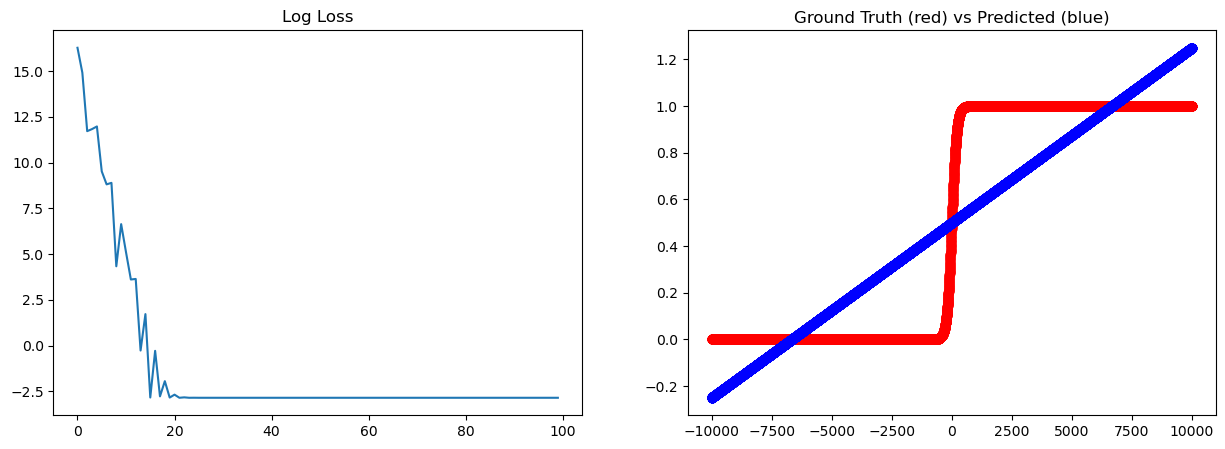

In [224]:
model = SLP1()
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=lr)

def train_regression(X, Y, model, criterion, optimizer):
    running_loss = []
    for epoch in range(epochs):
        out = model(X)

        loss = criterion(out, Y)

        loss.backward()

        optimizer.step()

        model.zero_grad()

        if epoch % 10 == 0:
            running_loss.append(np.log(loss.item()))

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title('Log Loss')
    axes[0].plot(np.arange(0, len(running_loss)), running_loss)
    axes[1].set_title('Ground Truth (red) vs Predicted (blue)')
    axes[1].scatter(X.detach().numpy(), Y.detach().numpy(), c='red')
    axes[1].scatter(X.detach().numpy(), out.detach().numpy(), c='blue')

train_regression(X, Y, model, criterion, optimizer)

In [9]:
class SLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear1(x)

In [12]:
x = np.arange(0, 100).reshape((100, 1))
X = torch.tensor(x).to(torch.float32)
Y = torch.tensor(x**2 + 4*x + 100).to(torch.float32)

epochs = 1000
lr = 1

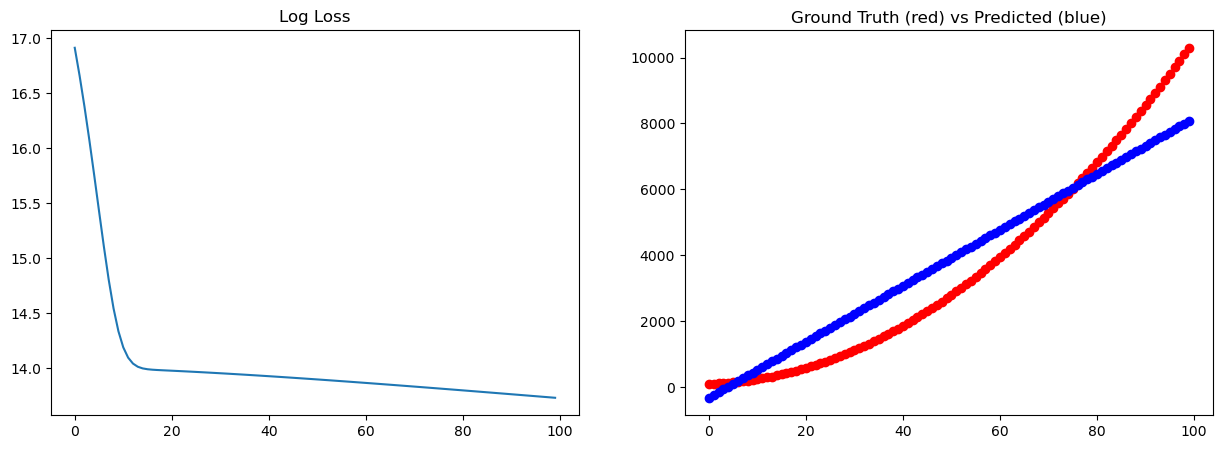

In [13]:
model = SLP2()
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr)

train_regression(X, Y, model, criterion, optimizer)

In [14]:
class SLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 1)
    
    def forward(self, X):
        X = torch.concatenate((X, X**2), axis=1)
        return self.linear1(X)

In [15]:
x = np.arange(0, 100).reshape((100, 1))
X = torch.tensor(x).to(torch.float32)
Y = torch.tensor(x**2 + 4*x + 100).to(torch.float32)

epochs = 1000
lr = 1

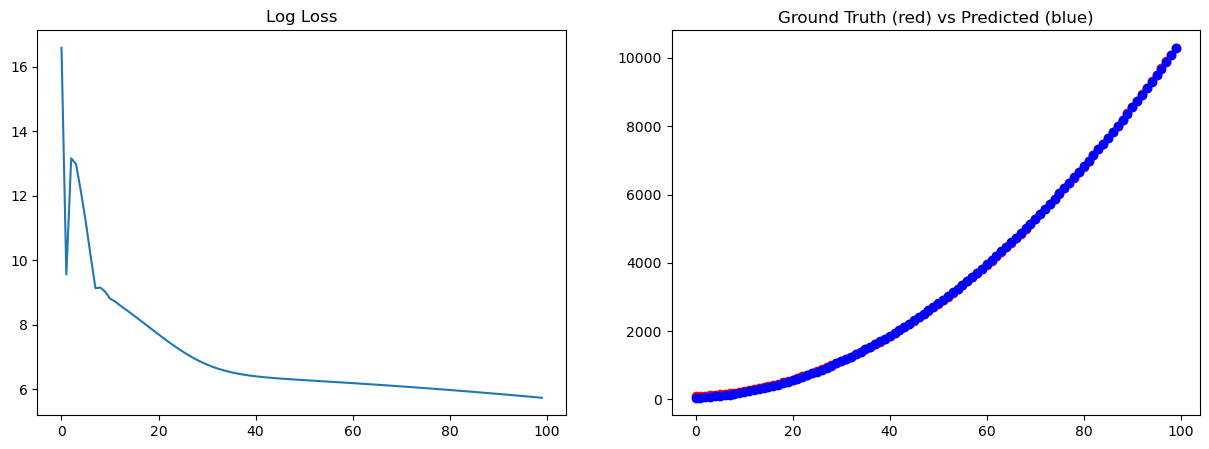

In [16]:
model = SLP3()
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr)

train_regression(X, Y, model, criterion, optimizer)

In [216]:
class SLP4(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, X):
        return self.sigmoid(self.linear1(X))

In [217]:
model = SLP4()

In [218]:
out = model(torch.tensor([[10]]).to(torch.float32))
criterion = nn.MSELoss()
loss = criterion(out, torch.tensor([[11]]).to(torch.float32))
loss.backward()

In [221]:
list(model.linear1.parameters())[1].grad

tensor([-1.0701])

In [222]:
list(model.linear1.parameters())

[Parameter containing:
 tensor([[-0.2643]], requires_grad=True),
 Parameter containing:
 tensor([-0.2696], requires_grad=True)]

In [205]:
x = np.arange(-10000, 10000).reshape((20000, 1))
X = torch.tensor(x).to(torch.float32)
Y = torch.tensor(1 / (1 + np.exp(-x/100))).to(torch.float32)

epochs = 1000
lr = 0.03

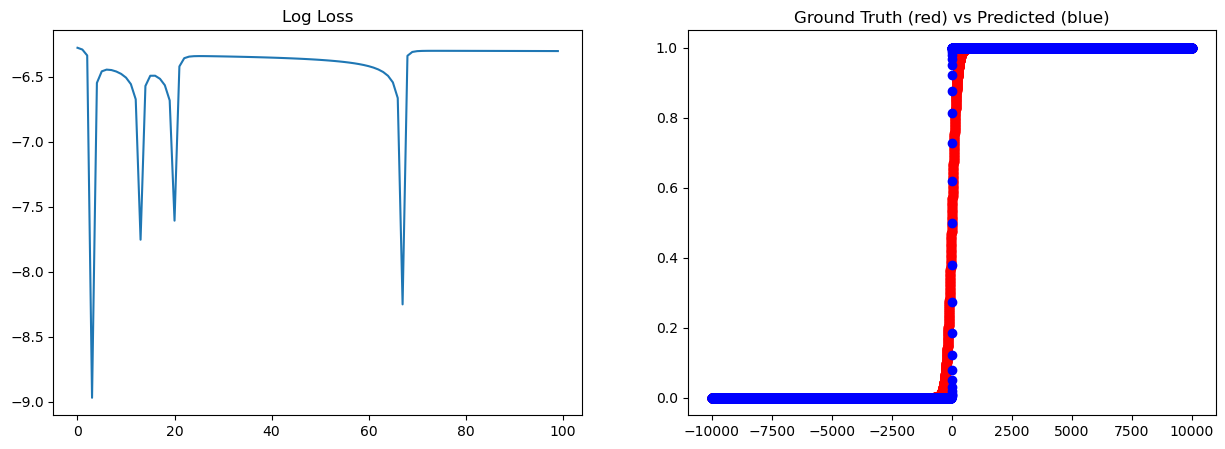

In [227]:
model = SLP4()
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr)

train_regression(X, Y, model, criterion, optimizer)

In [228]:
class MLP(nn.ModuleDict):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(1, 20)
        self.linear2 = nn.Linear(20, 20)
        self.linear3 = nn.Linear(20, 1)
    
    def forward(self, X):
        x = self.relu(self.linear1(X))
        return self.linear3(self.relu(self.linear2(x)))

In [229]:
x = np.arange(-100, 100).reshape((200, 1))
X = torch.tensor(x).to(torch.float32)
Y = torch.tensor(x**2 + 4*x + 100).to(torch.float32)

epochs = 1000
lr = 0.03

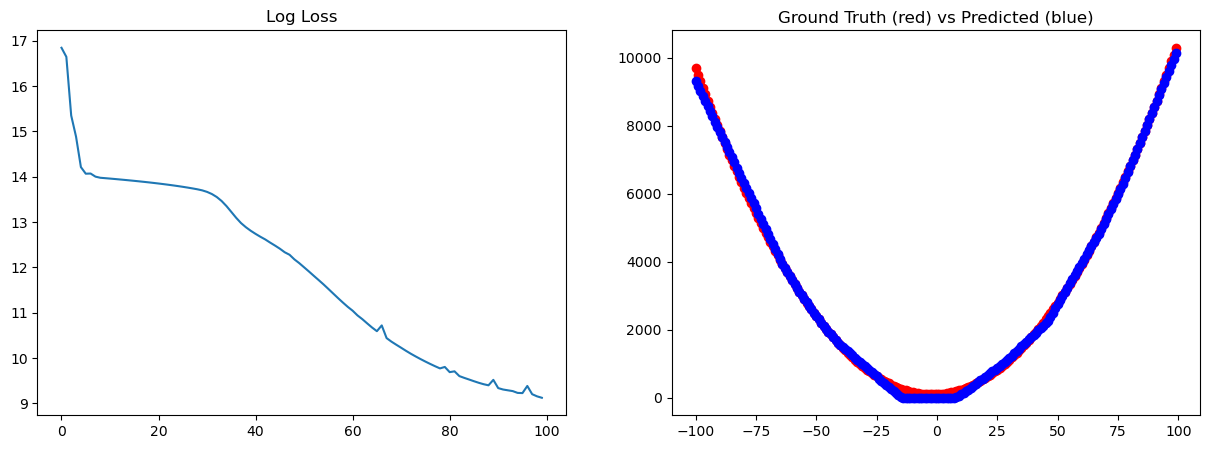

In [231]:
model = MLP()
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr)

train_regression(X, Y, model, criterion, optimizer)

In [173]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(2, 16)
        self.linear2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, X):
        return self.sigmoid(self.linear2(self.relu(self.linear1(X))))

In [174]:
from sklearn.datasets import make_circles
 
X, y = make_circles(random_state=42)
X, y = torch.tensor(X).to(torch.float32), torch.tensor(y).to(torch.float32)

epochs = 1000
lr = 0.003

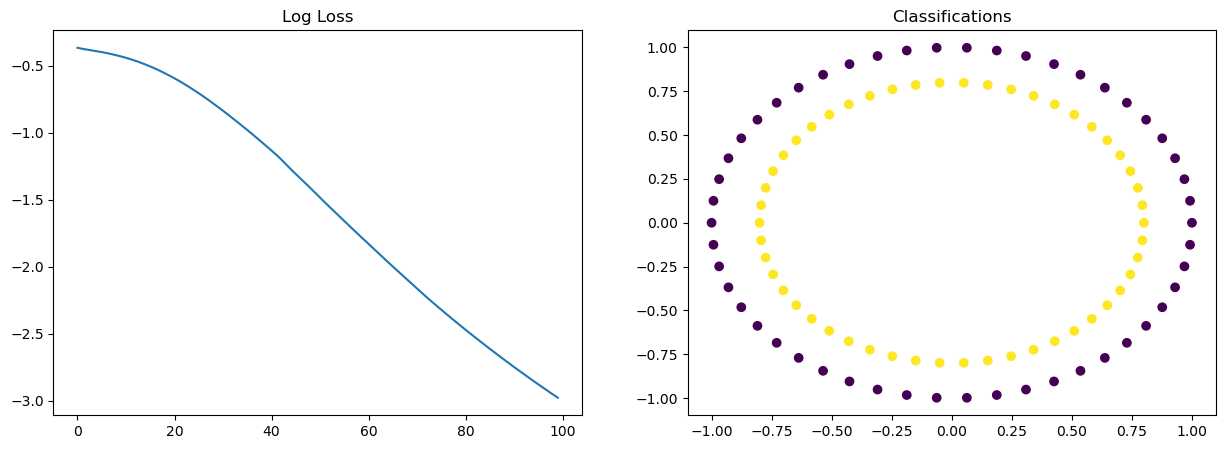

In [175]:
model = BinaryClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

def train_classification(X, y, model, criterion, optimizer):
    running_loss = []
    for epoch in range(epochs):
        out = model(X)

        loss = criterion(out, y[:,None])

        loss.backward()

        optimizer.step()

        model.zero_grad()

        if epoch % 10 == 0:
            running_loss.append(np.log(loss.detach().numpy()))
    
    X = X.detach().numpy()
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title('Log Loss')
    axes[0].plot(np.arange(0, len(running_loss)), running_loss)
    axes[1].set_title('Classifications')
    axes[1].scatter(X[:,0], X[:,1], c=np.round(out.detach().numpy()))
    
train_classification(X, y, model, criterion, optimizer)

In [232]:
def positional_encoding(coords, L):
    embeddings = [coords]
    for freq in 2.0 ** torch.arange(L):
        embeddings.append(torch.sin(freq * coords))
        embeddings.append(torch.cos(freq * coords))

    # Concatenate all embeddings along the last dimension
    encoded_coords = torch.cat(embeddings, dim=-1)  # Shape: (B, 4 * L)

    return encoded_coords

class NeuralField(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.linear1 = nn.Linear(42, 256)
        self.linear2 = nn.Linear(256, 256)
        self.linear3 = nn.Linear(256, 256)
        self.linear4 = nn.Linear(256, 3)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, X):
        x = positional_encoding(X, 10)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.relu(self.linear3(x))
        x = self.linear4(x)
        return self.sigmoid(x)

In [235]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class PixelDataset(Dataset):
    def __init__(self, im):
        self.H, self.W = im.shape[0], im.shape[1]
        self.u = torch.tensor(np.stack(np.mgrid[:self.H, :self.W], axis=-1)).reshape((self.H*self.W, 2)).to(torch.float32)
        self.u[:,0] /= self.H
        self.u[:,1] /= self.W
        self.im = im.reshape(self.H*self.W, 3) / 255.0
        
    def __len__(self) -> int:
        return len(self.im)
    
    def __getitem__(self, idx):
        return self.u[idx], self.im[idx]
    
epochs = 100
lr = 1e-3
batch_size = 1000

im = Image.open("./assets/fox.jpg")
new_size = tuple([int(dim * 0.2) for dim in im.size])
im = np.array(im.resize(new_size))
dataset = PixelDataset(torch.tensor(im).to(torch.float32))

dataloader = DataLoader(dataset, batch_size, shuffle=True)

In [236]:
model = NeuralField()
criterion = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr)

def train_regression(dataloader, model, criterion, optimizer):
    running_loss = []
    for epoch in range(epochs):
        for batch_idx, (inputs, targets) in enumerate(dataloader):
            out = model(inputs)
            
            loss = criterion(out, targets)

            loss.backward()

            optimizer.step()

            optimizer.zero_grad()

            print(np.log(loss.item()))

train_regression(dataloader, model, criterion, optimizer)

-2.37310655015636
-2.433184594892448
-2.4743540897398324
-2.527035234126443
-2.5813291401706056
-2.6188500464596287
-2.6963904301235493
-2.680208203997277
-2.718486579531601
-2.706200019782308
-2.7481344635911586
-2.8622369926829982
-2.875546245516105
-2.9210088823301428
-3.0507997071516426
-3.003961515821452
-3.092146083338379
-3.1536146364791855
-3.1081088465937508
-3.292464476839655
-3.260813070258625
-3.29047270474389
-3.2720684993290043
-3.34905284645802
-3.2709153701521276
-3.3433735457017475
-3.3307921924309944
-3.4380020001590257
-3.393590976698091
-3.337404789506958
-3.487180841505705
-3.495114485776634
-3.6071933440733206
-3.5290260808222644
-3.3831629264562615
-3.3926629643233266
-3.4936180148202287
-3.556597208479518
-3.579759046869291
-3.5799660925911576
-3.6998795556004582
-3.6531730370977233
-3.6455602131461715
-3.66230047171625
-3.6373625108575585
-3.746118949335486
-3.6854314502628895
-3.591077052986308
-3.7812444988472214
-3.807975346278465
-3.7125053476315246
-3.6761

C:\Users\cramk\AppData\Local\Temp\ipykernel_5040\2747162474.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  neural = model(torch.tensor(dataset.u)).reshape(dataset.H, dataset.W, -1).to(torch.float32)


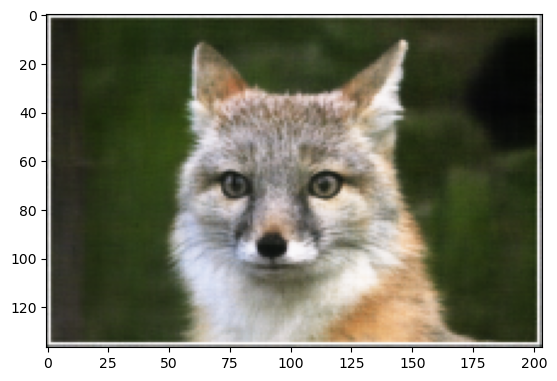

In [237]:
neural = model(torch.tensor(dataset.u)).reshape(dataset.H, dataset.W, -1).to(torch.float32)

plt.imshow(neural.detach().numpy())